# LendingClub Keras Project

LendingClub is an American peer-to-peer lending company and the world's largest peer-to-peer lending platform. The platform allowed borrowers to create unsecured personal loans from \\$1,000 to \\$40,000 and investors could invest based on information that was provided about the borrower. 

The data is a subset obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club and will be used for this project.

Utilising past data on loans with information on borrowers' ability to pay off the loan or being Charged Off, a model can be made to predict if a borrower can pay back their loan. This model can be used for future customers to assess their ability for loan repayment and could aid in deciding if a loan should be provided.

The data info file is as follows:

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

### Loading feature information for easy lookup in future

In [159]:
import pandas as pd
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [9]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [10]:
feat_info('mort_acc')

Number of mortgage accounts.


### Load data and import

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline
df = pd.read_csv('lending_club_loan_reduced.csv')

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

# Exploratory Data Analysis
Figure out important variables, analyze relationships, visualize data

Goal is to predit loan_status (Fully Paid or Charged Off)

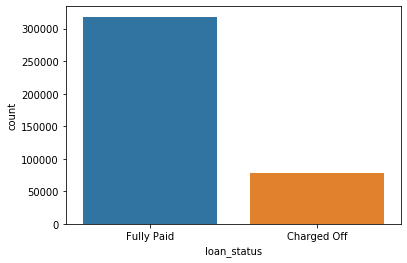

In [14]:
sns.countplot(x='loan_status',data=df)

**Visualize loan_amnt**

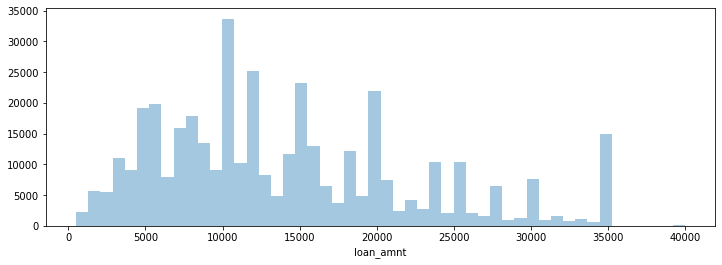

In [15]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=False)

**Explore correlation between feature variables**

In [19]:
df_corr = df.corr()
df_corr

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


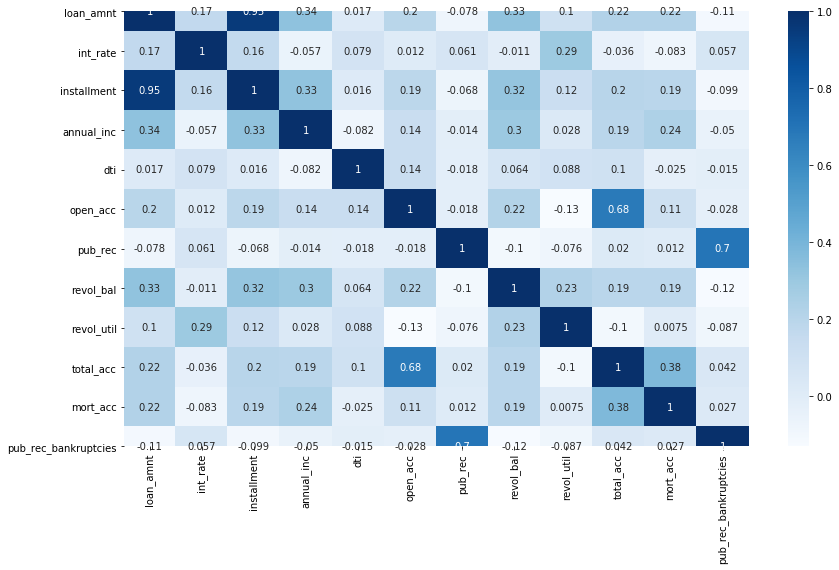

In [18]:
plt.figure(figsize=(14,8))
sns.heatmap(data=df_corr, annot=True,cmap='Blues')

**There's a strong correlation between loan_amnt and installment**

In [20]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


In [21]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


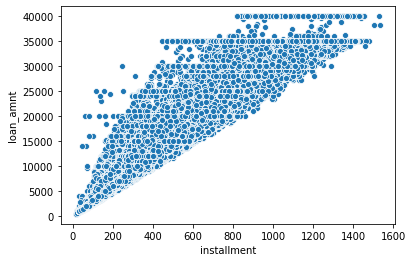

In [22]:
sns.scatterplot(x='installment',y='loan_amnt',data=df)

**See relationship with boxplot for loan_status and loan_amnt**

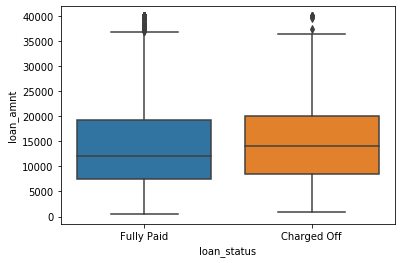

In [24]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

**Calculating summary statistics for loan amount grouped by loan_status**

In [26]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Exploring the Grade, subgrade columns and their relationship**

In [28]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [29]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

**Sub_grade seems to be a further category of grade**

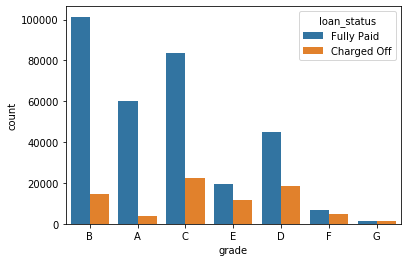

In [31]:
sns.countplot('grade',data=df,hue='loan_status')

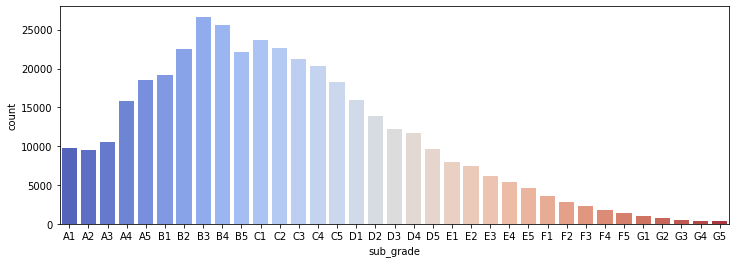

In [32]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )

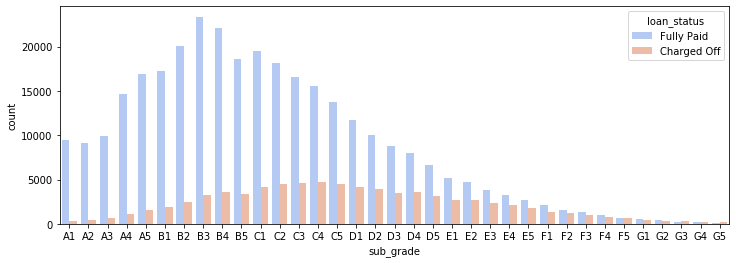

In [33]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

**F and G subgrades don't seem to get paid back often. Isolate and recreate the countplot for the specific subgrades.**

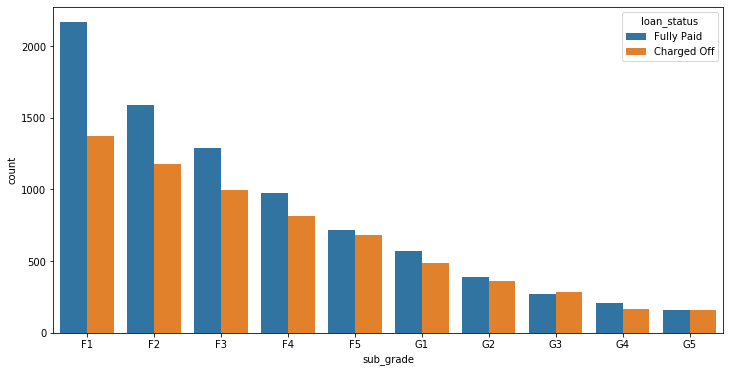

In [35]:
fg_iso = df[(df['grade']=='F') | (df['grade']=='G')]

plt.figure(figsize=(12,6))
subgrade_order = sorted(fg_iso['sub_grade'].unique())
sns.countplot(x='sub_grade',data=fg_iso,order = subgrade_order,hue='loan_status')

**To make loan_status easier to work with a new column "loan repaid" will have 1 for loan_status "Fully paid" or a 0 if it was "Charged off"**

In [36]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [37]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})

In [38]:
df[['loan_status','loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


**Creating a bar plot showing the correlation of the numeric features to the new loan_repaid column**

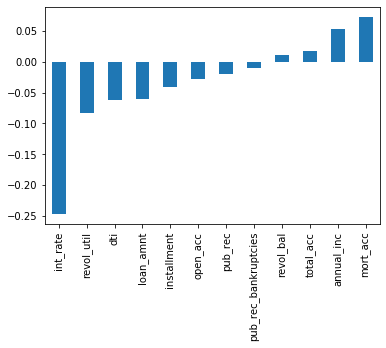

In [39]:
df.corr()['loan_repaid'].drop('loan_repaid').sort_values().plot(kind='bar')

# Data Preprocessing
**Clean data, remove duplicate features and convert categorical string features to dummy variables**

In [40]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


## Missing Data

**Compare length of dataframe (to see total entries) to category values that are null. Then show as a percentage of null values out of the total.**

In [41]:
len(df)

396030

In [43]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [44]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**Examining emp_title (9.54%) and emp_length (4.62%)**

In [45]:
feat_info('emp_title')

The job title supplied by the Borrower when applying for the loan.*


In [46]:
feat_info('emp_length')

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [47]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
City of Manhattan Beach       1
HOPE Animal Shelter           1
Vice Presidence               1
Adelberg Associates           1
rurual mail carrier           1
Name: emp_title, Length: 173105, dtype: int64

**There are too many unique job titles to try to convert into dummy variables so emp_title will be dropped.**

In [48]:
df.drop('emp_title',axis=1,inplace=True)

In [49]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid'], dtype='object')

**Create count plot of emp_length feature column by sorted order of the values.**

In [50]:
emp_len_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

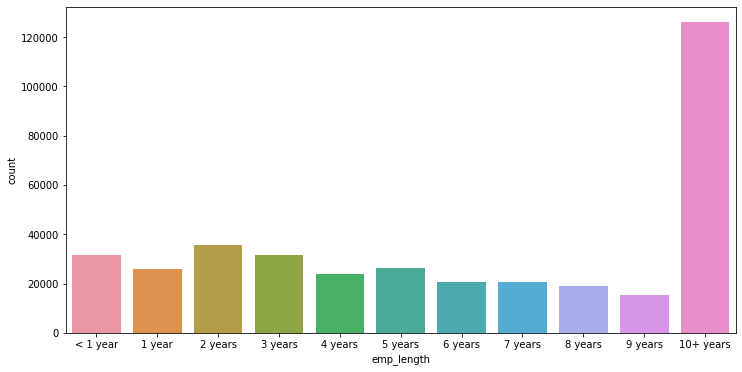

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(x='emp_length',order=emp_len_order,data=df)

In [52]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

**Comparing loan_status with emp_length using a countplot with a hue for Fully Paid and Charged Off**

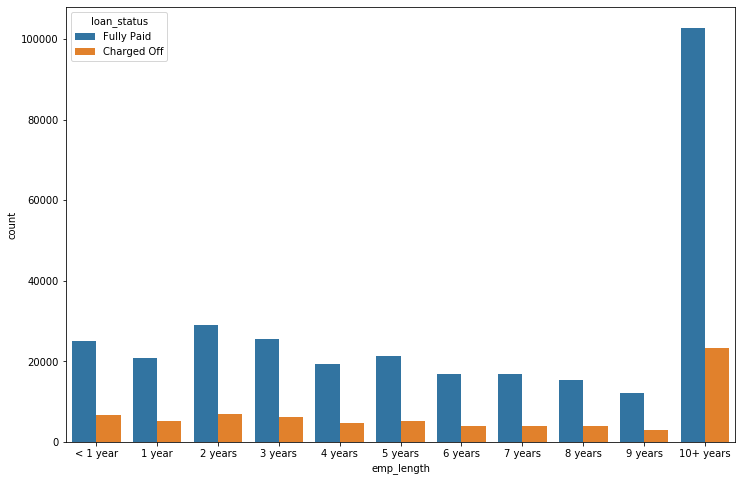

In [53]:
plt.figure(figsize=(12,8))
sns.countplot(x='emp_length',order=emp_len_order,data=df,hue='loan_status')

**To get a better idea on the relationship between employment length and being charged off we look for a percentage of charge offs per category. This shows the percentage of people per employment length that didn't pay back their loan. This will be expressed as a bar plot**

In [54]:
emp_len1 = df[df['loan_status']=="Charged Off"].groupby('emp_length').count()['loan_amnt']

In [58]:
emp_len1

emp_length
1 year        5154
10+ years    23215
2 years       6924
3 years       6182
4 years       4608
5 years       5092
6 years       3943
7 years       4055
8 years       3829
9 years       3070
< 1 year      6563
Name: loan_amnt, dtype: int64

In [59]:
emp_len2 = df[df['loan_status']=="Fully Paid"].groupby('emp_length').count()['loan_amnt']

In [60]:
emp_len2

emp_length
1 year        20728
10+ years    102826
2 years       28903
3 years       25483
4 years       19344
5 years       21403
6 years       16898
7 years       16764
8 years       15339
9 years       12244
< 1 year      25162
Name: loan_amnt, dtype: int64

In [62]:
emp_percent = emp_len1/emp_len2
emp_percent

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_amnt, dtype: float64

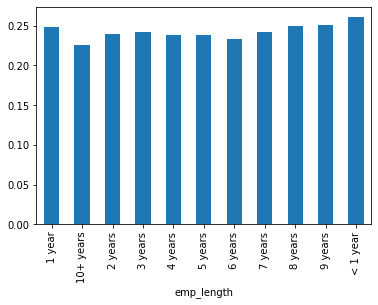

In [64]:
emp_percent.plot(kind='bar')

**Since charge off rates are extremely similar across employment lengths the feature column for emp_length will be dropped.**

In [66]:
df = df.drop('emp_length',axis=1)

In [67]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid'], dtype='object')

**Check remaining missing data columns**

In [68]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [69]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [70]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**Title is a subcategory of purpose column. Title column will be dropped.**

In [71]:
df = df.drop('title',axis=1)

In [72]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid'], dtype='object')

**Fill in missing values for the mort_acc feature**

In [73]:
feat_info('mort_acc')

Number of mortgage accounts.


In [74]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

**In order to fill in mort_acc identify the correlation of other columns to see which mort_acc correlates highest with.**

In [75]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

**total_acc correlates the most with mort_acc which makes logical sense. Using fillna() group the dataframe by total_acc and calculate mean value for mort_acc per total_acc entry. This will be used to full the mort_acc.**

In [77]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [78]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [80]:
total_acc_avg[3.0]

0.05202312138728324

In [81]:
def fill_mort(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [82]:
df['mort_acc'] = df.apply(lambda x: fill_mort(x['total_acc'], x['mort_acc']), axis=1)

In [83]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**revol_util and pub_rec_bankruptcies account for less than 0.5% of the data and rows they correspond to can be dropped.**

In [84]:
df.dropna(inplace=True)

In [85]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables
**After missing data has been dealt with the string values need to be adjusted to better suit the model. List all categories by value type.**

In [87]:
dftype = df.columns.to_series().groupby(df.dtypes).groups
dftype

{dtype('int64'): Index(['loan_repaid'], dtype='object'),
 dtype('float64'): Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies'], dtype='object'),
 dtype('O'): Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address'], dtype='object')}

In [89]:
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [90]:
df['term'].head()

0     36 months
1     36 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

**Convert the term feature into 36 or 60 integer numeric data type using .apply()**

In [91]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))


In [92]:
df['term'].head()

0    36
1    36
2    36
3    36
4    60
Name: term, dtype: int64

In [93]:
df['term'].unique()

array([36, 60], dtype=int64)

**grade feature is a broader category of sub_grade so it will be dropped.**

In [95]:
df.drop('grade', axis=1, inplace = True)

**Convert subgrade into dummy variables and concatenate these columns to the original dataframe and drop the subgrade column.**

In [96]:
subgrade_dum = pd.get_dummies(df['sub_grade'], drop_first=True)

In [97]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dum],axis=1)

**Drop the loan_status column to prevent data leakage into the training model since it will be predicted**

In [98]:
df = df.drop('loan_status',axis=1)


In [99]:
df.iloc[3]

loan_amnt                                                  7200
term                                                         36
int_rate                                                   6.49
installment                                              220.65
home_ownership                                             RENT
annual_inc                                                54000
verification_status                                Not Verified
issue_d                                                Nov-2014
purpose                                             credit_card
dti                                                         2.6
earliest_cr_line                                       Sep-2006
open_acc                                                      6
pub_rec                                                       0
revol_bal                                                  5472
revol_util                                                 21.5
total_acc                               

**Converting verification_status, application_type, initial_list_status, purpose columns into dummy variables and concatenating them with the original dataframe.**

In [101]:
print(df['verification_status'].value_counts() ,"\n")

print(df['application_type'].value_counts() ,"\n")

print(df['initial_list_status'].value_counts() ,"\n")

print(df['purpose'].value_counts())

Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64 

INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64 

f    237346
w    157873
Name: initial_list_status, dtype: int64 

debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64


In [102]:
verfication_dum = pd.get_dummies(df['verification_status'], drop_first=True)
application_type_dum = pd.get_dummies(df['application_type'], drop_first=True)
initial_list_status_dum = pd.get_dummies(df['initial_list_status'], drop_first=True)
purpose_dum = pd.get_dummies(df['purpose'], drop_first=True)

In [103]:
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,verfication_dum,application_type_dum,initial_list_status_dum,purpose_dum],axis=1)

In [109]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership', 'annual_inc', 'issue_d', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified', 'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation', 'educational', 'home_improvement', 'house', 'major_purchase', 'medical', 'moving', 'other', 'renewable_energy', 'small_business', 'vacation', 'wedding'], dtype='object')

**home_ownership values**

In [110]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**replace NONE and ANY to OTHER and convert to dummy variables: MORTGAGE, RENT, OWN, OTHER. Then drop original columns from dataframe**

In [111]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [112]:
homeownership_dum = pd.get_dummies(df['home_ownership'], drop_first=True)

In [113]:
homeownership_dum

,OTHER,OWN,RENT
0,0,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,0
...,...,...,...
396025,0,0,1
396026,0,0,0
396027,0,0,1
396028,0,0,0


In [114]:
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,homeownership_dum],axis=1)

In [115]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified', 'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation', 'educational', 'home_improvement', 'house', 'major_purchase', 'medical', 'moving', 'other', 'renewable_energy', 'small_business', 'vacation', 'wedding', 'OTHER', 'OWN', 'RENT'], dtype='object')

**Extract zip code from address column by running a for loop for the zip code characters**

In [117]:
df['address']

0            0174 Michelle Gateway\r\nMendozaberg, OK 22690
1         1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2         87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3                   823 Reid Ford\r\nDelacruzside, MA 00813
4                    679 Luna Roads\r\nGreggshire, VA 11650
                                ...                        
396025     12951 Williams Crossing\r\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\r\nRachelborough, ...
396027    953 Matthew Points Suite 414\r\nReedfort, NY 7...
396028    7843 Blake Freeway Apt. 229\r\nNew Michael, FL...
396029        787 Michelle Causeway\r\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [118]:
df['address'] = df['address'].apply(lambda zip: zip[-5:])

In [119]:
df['zip_code'] = df['address']
df = df.drop('address',axis=1)

In [120]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified', 'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation', 'educational', 'home_improvement', 'house', 'major_purchase', 'medical', 'moving', 'other', 'renewable_energy', 'small_business', 'vacation', 'wedding', 'OTHER', 'OWN', 'RENT', 'zip_code'], dtype='object')

In [122]:
df['zip_code'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

**Convert zip_code into dummy variables. Concatenate the dummy variables and drop the original column**

In [123]:
zipcode_dum = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop('zip_code',axis=1)
df = pd.concat([df,zipcode_dum],axis=1)

In [124]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified', 'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation', 'educational', 'home_improvement', 'house', 'major_purchase', 'medical', 'moving', 'other', 'renewable_energy', 'small_business', 'vacation', 'wedding', 'OTHER', 'OWN', 'RENT', '05113', '11650', '22690', '29597', '30723', '48052', '70466', '86630', '93700'], dtype='object')

**issue_d**

In [128]:
feat_info('issue_d')

The month which the loan was funded


**Since issue_d is the date of funding of the loan it provides data leakage for the target variable (loan_status) so it must be dropped**

In [129]:
df = df.drop('issue_d',axis=1)

**Extract year from earliest_cr_line and drop the original column**

In [131]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [132]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda item: int(item[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [133]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified', 'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation', 'educational', 'home_improvement', 'house', 'major_purchase', 'medical', 'moving', 'other', 'renewable_energy', 'small_business', 'vacation', 'wedding', 'OTHER', 'OWN', 'RENT', '05113', '11650', '22690', '29597', '30723', '48052', '70466', '86630', '93700', 'earliest_cr_year'], dtype='object')

In [134]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

### Train Test Split data
**Data will be split for training and testing purposes for use of the model. This is done by importing train_test_split from sklearn. Use loan_repaid column which was converted to 1 for 'Fully Paid' and 0 for 'Charged Off' as the target**

In [135]:
from sklearn.model_selection import train_test_split

In [137]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

**train_test_split performed with parameters test_size = 0.2 (proportion of dataset to use as test) and a random state 101**

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### Normalize Data using MinMaxScaler

In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [140]:
X_train = scaler.fit_transform(X_train)

In [141]:
X_test = scaler.transform(X_test)

## Create tensorflow Model

In [142]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**Model is sequential with nodes 78, 39, 19, 1**

In [143]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

**Fit model to training data for 25 epochs with batch size 256.**

In [144]:
model.fit(x=X_train, y=y_train, epochs=25,batch_size=256,validation_data=(X_test, y_test))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 316175 samples, validate on 79044 samples
Epoch 1/25
316175/316175 [==============================] - 3s 11us/sample - loss: 0.3069 - val_loss: 0.2647
Epoch 2/25
316175/316175 [==============================] - 3s 9us/sample - loss: 0.2667 - val_loss: 0.2641
Epoch 3/25
316175/316175 [==============================] - 3s 9us/sample - loss: 0.2636 - val_loss: 0.2625
Epoch 4/25
316175/316175 [==============================] - 3s 9us/sample - loss: 0.2618 - val_loss: 0.2624
Epoch 5/25
316175/316175 [==============================] - 3s 9us/sample - loss: 0.2610 - val_loss: 0.2631
Epoch 6/25
316175/316175 [==============================] - 3s 9us/sample - loss: 0.2606 - val_loss: 0.2615
Epoch 7/25
316175/316175 [==============================] - 3s 9us/sample - loss: 0.2600 - val_loss: 0.2625
Epoch 8/25
316175

In [145]:
from tensorflow.keras.models import load_model

In [146]:
model.save('LC_data_project.h5')

## Evaluate Model Performance
**Now that the model has been created we will display a plot of validation loss vs. training loss**

In [147]:
losses = pd.DataFrame(model.history.history)

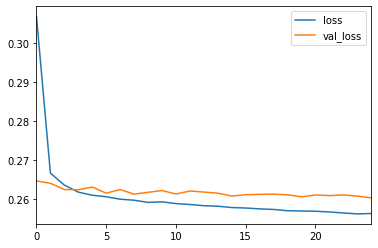

In [148]:
losses.plot()

**Using the X_test set we will create predictions and display a confusion matrix and a classification report**

In [149]:
from sklearn.metrics import classification_report, confusion_matrix

In [150]:
pred = model.predict_classes(X_test)

In [151]:
print(confusion_matrix(y_test,pred))

[[ 6930  8728]
 [  175 63211]]


In [152]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



**Precision is very good for this model. The F1 score (which accounts for precision and recall) is 87%**

### Random testing of model on a 'new customer'
**Using the dataset generate a random customer and run the model to determine if this person will repay their loan.**

In [156]:
import random
random.seed(123)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt            12000.00
term                    36.00
int_rate                 6.92
installment            370.09
annual_inc          150000.00
                      ...    
48052                    0.00
70466                    0.00
86630                    0.00
93700                    0.00
earliest_cr_year      1998.00
Name: 27510, Length: 78, dtype: float64

In [157]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]])

**Check to see if the customer actually paid their loan.**

In [158]:
df.iloc[random_ind]['loan_repaid']

1.0

**The customer has Fully Paid their loan which is what the model predicted.**